# Midterm

Ok, we've reviewed a lot so far, so before we continue onto more specific kinds of analysis, using LLMs, and machine learning, complete this notebook that builds on the lessons in this series on pandas and EDA.

___

## Dataset
### *The Pudding*'s Film Dialogue Data

The dataset that we're working with in this lesson is taken from Hannah Andersen and Matt Daniels's *Pudding* essay, ["Film Dialogue from 2,000 screenplays, Broken Down by Gender and Age"](https://pudding.cool/2017/03/film-dialogue/). The dataset provides information about 2,000 films from 1925 to 2015, including characters’ names, genders, ages, how many words each character spoke in each film, the release year of each film, and how much money the film grossed. They included character gender information because they wanted to contribute data to a broader conversation about how "white men dominate movie roles."

___

## Import Pandas

In [20]:
import pandas as pd
pd.options.display.max_rows = 200

## Import the Data

In [21]:
film_df = pd.read_csv('../data/Pudding/Pudding-Film-Dialogue-Clean.csv', delimiter=",", encoding='utf-8')

## Overview

To look at a random *n* number of rows in a DataFrame, we can use a method called `.sample()`.

In [22]:
film_df.sample(10)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
11640,The Wolf of Wall Street,2013,Mark Hanna,man,422,0.024604,44.0,125.0,3737
9774,The Program,1993,Edward Learniha,man,402,0.015685,NaN,48.0,3142
22860,The Thin Red Line,1998,Pvt. Charlie Da,man,824,0.044642,32.0,67.0,9177
2391,A Perfect World,1993,Bradley,man,159,0.013489,36.0,65.0,1222
16483,Trumbo,2015,Ian Mclellan Hu,man,153,0.016696,44.0,NaN,5506
18751,Jennifer's Body,2009,Jennifer,woman,2837,0.288665,23.0,18.0,7157
14310,Now and Then,1995,Samantha,woman,1645,0.392977,33.0,54.0,4723
11769,Zero Dark Thirty,2012,Debbie,woman,136,0.010291,29.0,104.0,3766
4428,The Back-up Plan,2010,Olivia,woman,188,0.015240,31.0,41.0,1734
1780,Kafka,1991,Youthful Anarch,man,135,0.017426,38.0,2.0,1067


Generate information about all the columns in the data 

In [23]:
film_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23047 entries, 0 to 23046
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   23047 non-null  object 
 1   release_year            23047 non-null  int64  
 2   character               23047 non-null  object 
 3   gender                  23047 non-null  object 
 4   words                   23047 non-null  int64  
 5   proportion_of_dialogue  23047 non-null  float64
 6   age                     18262 non-null  float64
 7   gross                   19386 non-null  float64
 8   script_id               23047 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.6+ MB


Just like Python has different data types, Pandas has different data types, too. These data types are automatically assigned to columns when we read in a CSV file. We can check these Pandas data types with the [`.dtypes` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html).



| **Pandas Data Type** |  **Explanation**                                                                                   |
|:-------------:|:---------------------------------------------------------------------------------------------------:|
| `object`         | string                                                                               |
| `float64`         | float                                               |
| `int64`       | integer                                                        |
| `datetime64`       |  date time              

Make a histogram of the DataFrame

array([[<Axes: title={'center': 'release_year'}>,
        <Axes: title={'center': 'words'}>],
       [<Axes: title={'center': 'proportion_of_dialogue'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'gross'}>,
        <Axes: title={'center': 'script_id'}>]], dtype=object)

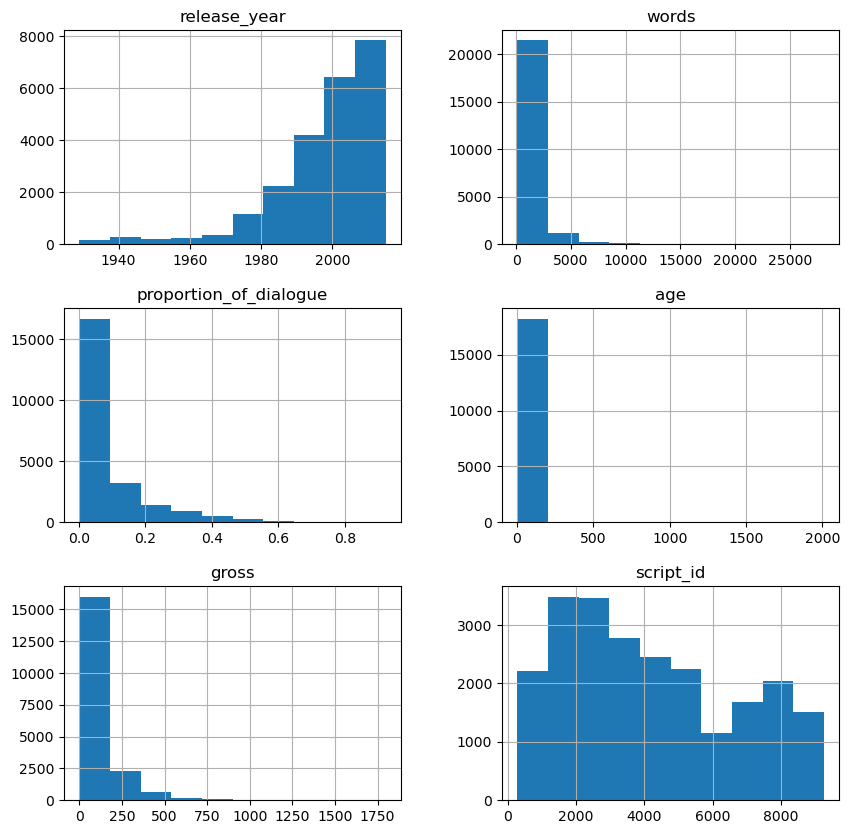

In [24]:
film_df.hist(figsize=(10,10))

Generate descriptive statistics for all the columns in the data 

In [25]:
film_df.describe(include='all')

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
count,23047,23047.000000,23047,23047,23047.000000,23047.000000,18262.000000,19386.000000,23047.000000
unique,1994,NaN,17543,3,NaN,NaN,NaN,NaN,NaN
top,Lone Star,NaN,Doctor,man,NaN,NaN,NaN,NaN,NaN
freq,40,NaN,37,16131,NaN,NaN,NaN,NaN,NaN
mean,NaN,1998.132425,NaN,NaN,907.902634,0.086518,42.275052,106.735428,4194.804486
std,NaN,14.746052,NaN,NaN,1399.616135,0.107746,57.912595,145.861933,2473.037601
min,NaN,1929.000000,NaN,NaN,101.000000,0.001537,3.000000,0.000000,280.000000
25%,NaN,1992.000000,NaN,NaN,193.000000,0.019773,30.000000,22.000000,2095.000000
50%,NaN,2001.000000,NaN,NaN,396.000000,0.042423,39.000000,56.000000,3694.000000
75%,NaN,2009.000000,NaN,NaN,980.000000,0.104171,50.000000,136.000000,6224.500000


### ❓ What patterns or outliers do you notice?

Not much can be seen from the release year other than there that the data spans from 1929 to 2015 covering a wide range of movie release years.
There are 1994 unique movie titles with "Lone Star" being the most frequent title. 
There are 17543 unique character names in the dataset. "Doctor" is the most frequent character name. 
The gender colum chategorizes characters into three genders. The most frequent gender is "man". The existence of NaN in the gender colum might be considered an outlier. 
The words columns shows a lot of variety and therefore the NaN values might be considered outliers. 
The proportion of dialogue spoken varies a lot as well ranging fgrom 0.0015 to 0.9243 which is a very big range. 
The age column ranges from 3 to 2009. There are some exceptionally large age values that could be considered outliers.

## Drop Rows

In [26]:
film_df[film_df['age'] > 100]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
4024,American Psycho,2000,Harold Carnes,man,434,0.025271,2000.0,24.0,1639
5254,Case 39,2009,Margaret Sulliv,woman,310,0.037944,2009.0,15.0,1962
5370,Chaos,2005,Bernie Callo,man,244,0.015051,2005.0,NaN,1985
5950,The Departed,2006,Realtor,man,148,0.005575,2006.0,175.0,2144
6899,Get Carter,2000,Thorpey,man,133,0.026552,2000.0,24.0,2380
7787,Into the Wild,2007,Bull,man,188,0.009936,2007.0,23.0,2625
7968,Jay and Silent Bob Strike Back,2001,Silent Bob'S Mo,woman,224,0.009292,2001.0,46.0,2673
9233,Never Been Kissed,1999,Monty Malik,man,104,0.005219,1999.0,95.0,2986
9617,The Piano,1993,Nessie,woman,116,0.012262,1993.0,84.0,3095
9819,Raging Bull,1980,Reporter,man,300,0.013364,1980.0,NaN,3169


If you want to double check, you can examine the [data that the Pudding shared here](https://github.com/matthewfdaniels/scripts/blob/graphs/character_list5.csv) (you can control + F to search for specific characters).

In [27]:
film_df = film_df.drop(film_df[film_df['age'] > 100].index) 

In [28]:
film_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23031 entries, 0 to 23046
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   23031 non-null  object 
 1   release_year            23031 non-null  int64  
 2   character               23031 non-null  object 
 3   gender                  23031 non-null  object 
 4   words                   23031 non-null  int64  
 5   proportion_of_dialogue  23031 non-null  float64
 6   age                     18246 non-null  float64
 7   gross                   19373 non-null  float64
 8   script_id               23031 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.8+ MB


In [29]:
film_df[film_df['age'] > 100]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id


## Rename Columns

In [30]:
film_df = film_df.rename(columns={'imdb_character_name': 'character', 'year': 'release_year'})

In [31]:
film_df.head()

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
0,The Bridges of Madison County,1995,Betty,woman,311,0.048639,35.0,142.0,280
1,The Bridges of Madison County,1995,Carolyn Johnson,woman,873,0.136534,NaN,142.0,280
2,The Bridges of Madison County,1995,Eleanor,woman,138,0.021583,NaN,142.0,280
3,The Bridges of Madison County,1995,Francesca Johns,woman,2251,0.352049,46.0,142.0,280
4,The Bridges of Madison County,1995,Madge,woman,190,0.029715,46.0,142.0,280


## Filter

Find a specific film that you're intersted and then filter the DataFrame for only rows relevant to that film. 

If you want to search for films by decade and genre, you can [search the with the Pudding's handy data viz here](https://pudding.cool/2017/03/film-dialogue/embed.html).

In [39]:
film_filter = film_df['title'] == "Batman"

If you want to sort by characters who speak the most, feel free to add `.sort_values(by='words', ascending=False)`

In [42]:
film_df[film_filter].sort_values(by='words', ascending=False)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
413,Batman,1989,Vicki Vale,woman,1136,0.302853,36.0,550.0,725
408,Batman,1989,Alexander Knox,man,895,0.238603,38.0,550.0,725
409,Batman,1989,Bruce Wayne,man,793,0.211410,38.0,550.0,725
412,Batman,1989,Joker,man,585,0.155958,52.0,550.0,725
411,Batman,1989,Harvey Dent,man,188,0.050120,52.0,550.0,725
410,Batman,1989,Carl Grissom,man,154,0.041056,70.0,550.0,725


Now pick a character from this film (or another character) and filter the DataFrame by character.

In [43]:
character_filter = film_df['character'] == "Bruce Wayne"

In [44]:
film_df[character_filter]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
401,Batman Returns,1992,Bruce Wayne,man,956,0.128047,41.0,341.0,722
409,Batman,1989,Bruce Wayne,man,793,0.211410,38.0,550.0,725
4558,Batman Forever,1995,Bruce Wayne,man,3210,0.266656,36.0,368.0,1775
5818,The Dark Knight,2008,Bruce Wayne,man,2470,0.073652,34.0,645.0,2106
22360,The Dark Knight Rises,2012,Bruce Wayne,man,1978,0.193561,38.0,489.0,8807


### ❓ How does this data align with your experience/knowledge of the film?

The data filtering is based on the film "Batman" and the character "Bruce Wayne." "Batman" is a well-known superhero character, and "Bruce Wayne" is the alter ego of Batman. The filtered data appears to align with the film's characters and context, as Bruce Wayne is indeed the character behind the Batman persona.

### ❓ How do these specific examples influence your thoughts about the data collection and categorization process? What would you have done differently (if anything)?

The data collection and categorization process seem to be quite accurate in this context. It correctly identifies the film "Batman" and associates the character "Bruce Wayne" with it. However, it's important to note that the success of data categorization depends on the quality of the initial data sources and the methodologies used.
If there were issues with the data collection process, it could lead to misclassification or incorrect associations. To improve this process, data providers should ensure accurate and consistent labeling, possibly through data validation and verification procedures.

## Sort Values

Sort the DataFrame from the character who has the highest `proportion_of_dialogue` to the lowest.  Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [45]:
film_df.sort_values(by='proportion_of_dialogue', ascending=False).head(20)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
7242,Happy Feet,2006,Mumble,man,2677,0.923422,25.0,262.0,2483
16371,The End of the Tour,2015,David Lipsky,man,3117,0.911137,32.0,3.0,5485
21092,Duel,1971,David Mann,man,2660,0.881086,47.0,NaN,8164
3650,127 Hours,2010,Aron Ralston,man,4336,0.842760,32.0,20.0,1520
22236,Alfie,2004,Alfie,man,5852,0.814815,32.0,18.0,8683
21663,Mala Noche,1986,Walt,man,2093,0.810612,NaN,NaN,8423
1019,Duck Soup,1933,Groucho,man,3697,0.730344,NaN,NaN,873
4569,The Battle of Algiers,1966,Col. Mathieu,man,4962,0.723113,44.0,6.0,1780
17750,1408,2007,Mike Enslin,man,2338,0.703581,41.0,91.0,6537
18138,Jumpin' Jack Flash,1986,Terry Dolittle,woman,4722,0.699452,31.0,60.0,6798


Sort the DataFrame from the character who has the lowest `proportion_of_dialogue` to the highest. Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [46]:
film_df.sort_values(by='proportion_of_dialogue').head(20)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
5283,Casino,1995,Piscano'S Wife,woman,104,0.001537,NaN,84.0,1963
5272,Casino,1995,Frankie Avalon,man,106,0.001566,56.0,84.0,1963
5291,Casino,1995,Vinny Forlano,man,112,0.001655,NaN,84.0,1963
5262,Casino,1995,Cashier,woman,114,0.001684,NaN,84.0,1963
5277,Casino,1995,La Banker,man,114,0.001684,61.0,84.0,1963
5292,Casino,1995,Winner,man,116,0.001714,NaN,84.0,1963
5286,Casino,1995,Security Guard,man,116,0.001714,55.0,84.0,1963
8031,JFK,1991,Prison Guard,man,106,0.001802,NaN,145.0,2682
5258,Casino,1995,Anna Scott,woman,124,0.001832,NaN,84.0,1963
5257,Casino,1995,Amy Rothstein (,woman,130,0.001921,NaN,84.0,1963


Sort the DataFrame from the character who speaks the least number of `words` to the character who speaks the most number of words. Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [47]:
film_df.sort_values(by='words').head(20)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
15233,Sweeney Todd: The Demon Barber of Fleet Street,2007,Happy Customer',woman,101,0.011676,NaN,66.0,5083
20449,Lawless,2012,Danny,man,101,0.009168,46.0,40.0,7882
21869,Transcendence,2014,Martin,man,101,0.012063,44.0,24.0,8525
17979,My Best Friend's Birthday,1987,Cute Girl,woman,101,0.010254,NaN,NaN,6625
22909,The Utah Murder Project,2006,Deputy Bracken,man,101,0.008809,45.0,NaN,9214
18487,Inside Man,2006,Miriam Douglas,woman,101,0.008012,NaN,117.0,6968
17857,Searching for Bobby Fischer,1993,Tournament Dire,man,101,0.010766,53.0,15.0,6576
15725,"The Chronicles of Narnia: The Lion, the Witch ...",2005,Maugrim,man,101,0.021734,47.0,396.0,5300
16598,Pok�mon: The First Movie - Mewtwo Strikes Back,1998,Umio,man,101,0.032268,32.0,158.0,5523
1224,Forrest Gump,1994,Abbie Hoffman,man,101,0.011111,34.0,686.0,921


### ❓ What patterns do you notice here? What surprises you or doesn't surprise you?

It is not surprising to see well known and major characters appear with the highest proportion of dialogue as they are central to the plott and have significant roles in the movie. Sorting by number of works spoken reveals characters who have a minimal speaking role or are present for a short duration in the films. It is not surprising to see minor background character who usually have the fewest spoken words at the top of the list. 

## Groupby

Group by film and then calculate the sum total for every column.

In [48]:
film_df.groupby('title').sum()

C:\Users\B.N.Singh\AppData\Local\Temp\ipykernel_1916\339622851.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  film_df.groupby('title').sum()


,release_year,words,proportion_of_dialogue,age,gross,script_id
title,,,,,,
(500) Days of Summer,26117,18500,1.0,378.0,481.0,19942
10 Things I Hate About You,23988,19680,1.0,307.0,780.0,18144
12 Years a Slave,56364,19628,1.0,712.0,1680.0,42476
12 and Holding,30075,15968,1.0,513.0,0.0,22710
127 Hours,8040,5145,1.0,114.0,80.0,6080
...,...,...,...,...,...,...
Zero Effect,13986,13927,1.0,227.0,21.0,57106
Zerophilia,16040,16686,1.0,160.0,0.0,30144
Zodiac,62217,14656,1.0,1071.0,1271.0,201221


Group by film, isolate the `words` column, and then calculate the sum total for every column.

In [49]:
film_df.groupby('title')['words'].sum()

title
(500) Days of Summer          18500
10 Things I Hate About You    19680
12 Years a Slave              19628
12 and Holding                15968
127 Hours                      5145
                              ...  
Zero Effect                   13927
Zerophilia                    16686
Zodiac                        14656
eXistenZ                       9447
xXx                            8285
Name: words, Length: 1994, dtype: int64

Group by film AND gender, isolate the column `words`, and then calculate the sum total for every column.

*Note: Remember that to group by multiple columns, you need to put the column names in square brackets `[]`.*

In [50]:
film_df.groupby(['title', 'gender'])['words'].sum()

title                       gender
(500) Days of Summer        man       12762
                            woman      5738
10 Things I Hate About You  man       10688
                            woman      8992
12 Years a Slave            man       16176
                                      ...  
Zodiac                      woman      1421
eXistenZ                    man        5695
                            woman      3752
xXx                         man        7287
                            woman       998
Name: words, Length: 3936, dtype: int64

## Filter, Then Groupby

Filter the DataFrame for only characters labeled as `woman`

In [51]:
women_filter = film_df['gender'] == 'woman'

In [52]:
women_film_df = film_df[women_filter]

Filter the DataFrame for only characters labeled as `man`

In [53]:
men_filter = film_df['gender'] == 'man'

In [54]:
men_film_df = film_df[men_filter]

Now group `women_film_df` by film, isolate the `words` column, and sum the `words` spoken by women.

In [55]:
women_by_film = women_film_df.groupby('title')['words'].sum()

Assign this Series to a new variable `women_by_film`

In [56]:
women_by_film = women_film_df.groupby('title')['words'].sum()
women_by_film

title
(500) Days of Summer          5738
10 Things I Hate About You    8992
12 Years a Slave              3452
12 and Holding                5324
127 Hours                      809
                              ... 
Zero Effect                   2216
Zerophilia                    4612
Zodiac                        1421
eXistenZ                      3752
xXx                            998
Name: words, Length: 1940, dtype: int64

Using the same construction, make a new another new variable `men_by_film`

In [57]:
men_by_film = men_film_df.groupby('title')['words'].sum()
men_by_film

title
(500) Days of Summer          12762
10 Things I Hate About You    10688
12 Years a Slave              16176
12 and Holding                10644
127 Hours                      4336
                              ...  
Zero Effect                   11711
Zerophilia                    12074
Zodiac                        13235
eXistenZ                       5695
xXx                            7287
Name: words, Length: 1992, dtype: int64

Sort `women_by_film` from the film with the most words to the film with the least words. Then examine the top 20 values.

In [58]:
women_by_film.sort_values(ascending=False)[:20]

title
Sex and the City               25184
Stepmom                        25014
Sense and Sensibility          23922
The Help                       21540
Beloved                        19594
Ghost World                    18692
Precious                       17536
Juno                           17534
Music of the Heart             17274
Drag Me to Hell                17236
Margaret                       17229
Amelia                         17014
The Horse Whisperer            16920
Copycat                        16078
Frances                        15978
Agnes of God                   15732
He's Just Not That Into You    15708
An Education                   14330
The Birds                      14284
Wild at Heart                  14014
Name: words, dtype: int64

Assign this sorted list of movies to the variable `top20_women`

In [59]:
top20_women = women_by_film.sort_values(ascending=False)[:20]
top20_women

title
Sex and the City               25184
Stepmom                        25014
Sense and Sensibility          23922
The Help                       21540
Beloved                        19594
Ghost World                    18692
Precious                       17536
Juno                           17534
Music of the Heart             17274
Drag Me to Hell                17236
Margaret                       17229
Amelia                         17014
The Horse Whisperer            16920
Copycat                        16078
Frances                        15978
Agnes of God                   15732
He's Just Not That Into You    15708
An Education                   14330
The Birds                      14284
Wild at Heart                  14014
Name: words, dtype: int64

Using the same construction, make a new variable `top20_men`

In [60]:
top20_men = men_by_film.sort_values(ascending=False)[:20]
top20_men

title
Casino                    57944
JFK                       50752
A Few Good Men            36484
Funny People              36278
Magnolia                  33024
High Fidelity             31114
The Dark Knight           30290
Troy                      29712
Gran Torino               29092
Life                      27748
Observe and Report        27534
Apt Pupil                 27428
Analyze This              26548
The Hangover              26538
Mr. Deeds Goes to Town    26508
Wall Street               26440
Jackie Brown              25984
Sling Blade               24964
Meet John Doe             24520
Clerks                    24428
Name: words, dtype: int64

### ❓ What patterns do you notice here? What surprises you or doesn't surprise you?

Grouping the DataFrame by film and summing the words spoken by women or men provides insights into the distribution of dialogue in films.
It allows us to identify which films have a significant presence of dialogue by characters of a particular gender.
It's not surprising to see that some films prominently feature dialogue by male characters, while others feature dialogue by female characters.
The patterns observed in the top 20 films with the most words spoken by women and men could vary widely. For instance, some films may be known for strong female leads, while others may have male-dominated casts.
These patterns reflect the diversity of storytelling in films and the varying roles of characters of different genders.

## Saving Plots

Make a bar chart of `top20_women`. Give the chart a title, and specify a color.

<Axes: xlabel='title'>

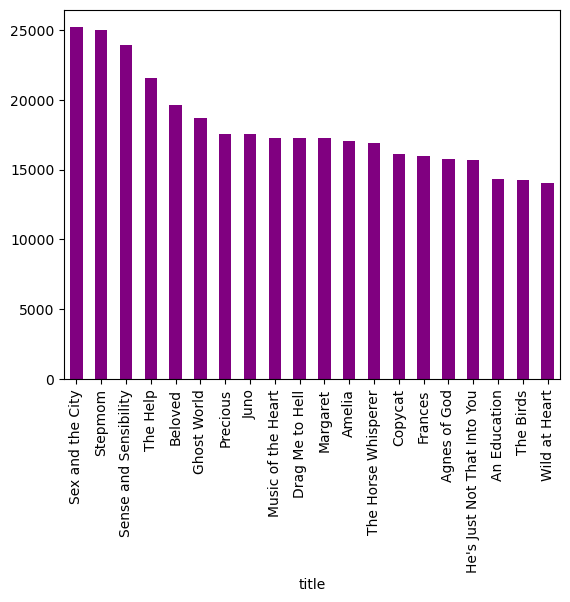

In [61]:
top20_women.plot(
    kind='bar',
    color= 'purple'
)

To save the plot, you can use `ax.figure.savefig()` and the name of the file in quotation marks.

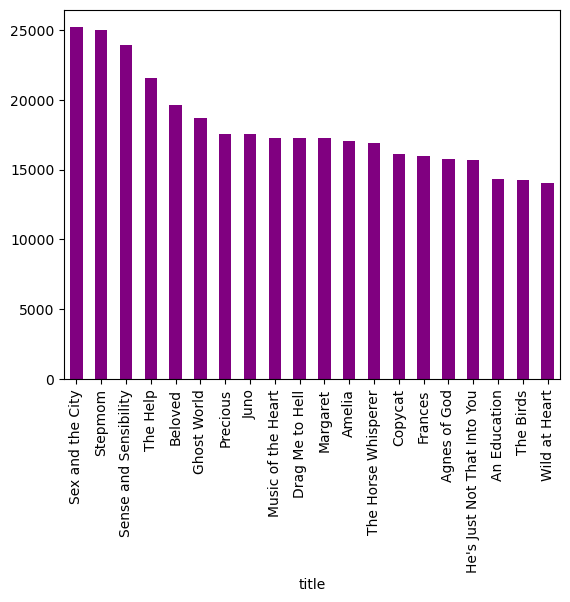

In [62]:
ax = top20_women.plot(
    kind='bar',
    color='purple'
)
ax.figure.savefig('./figures/top20_women.png')

Look in the file browser on the left and double click the PNG file. How does it look? Uh oh!

Sometimes parts of a plot will get cut off when you save it. To fix this issue, you can use a function from the Matplotlib library called `plt.tight_layout()`, which will adjust the plot before you save it.

To use this function, you need to `import matplotlib.pyplot as plt`.

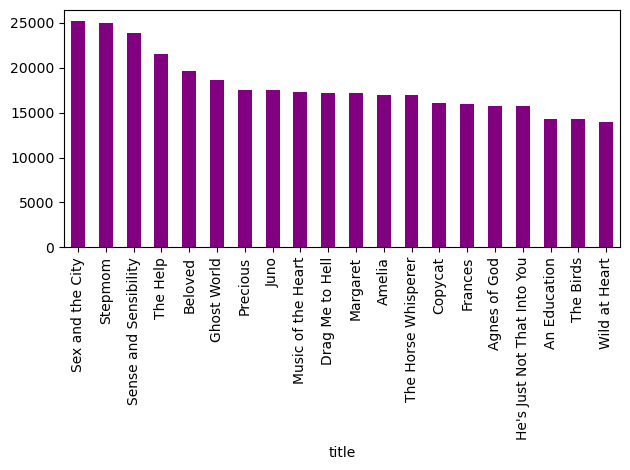

In [63]:
import matplotlib.pyplot as plt

ax = top20_women.plot(kind='bar', color='purple')
plt.tight_layout()
ax.figure.savefig('top20_women.png')

## Scatter Plots and Line Plots

Let's make a scatter plot that shows how many words women and men speak based on their age.

In [65]:
women_film_df.groupby('age')['words'].sum().reset_index()

,age,words
0,4.0,272
1,5.0,132
2,6.0,2406
3,7.0,8158
4,8.0,3260
5,9.0,6540
6,10.0,11771
7,11.0,11462
8,12.0,17316
9,13.0,12580


In [66]:
women_age_words = women_film_df.groupby('age')['words'].sum().reset_index()

In [67]:
men_age_words = men_film_df.groupby('age')['words'].sum().reset_index()

<Axes: xlabel='age', ylabel='words'>

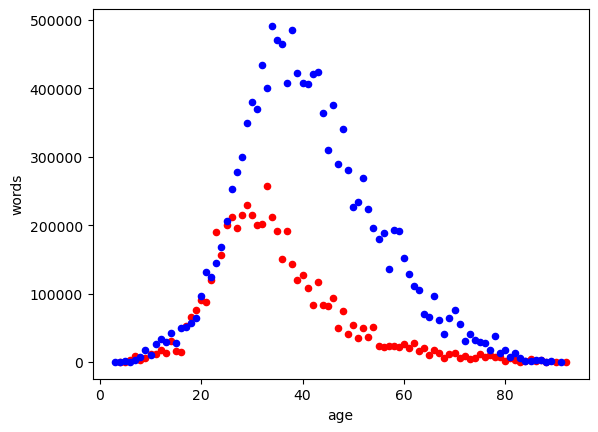

In [68]:
ax = women_age_words.plot(kind='scatter', x='age', y='words', color='red')
men_age_words.plot(ax=ax, kind='scatter', x='age', y='words', color='blue')

Now let's make a line plot of the exact same data. Copy and paste the code in the cell above and change it to produce a line plot instead of a scatter plot.

<Axes: xlabel='age'>

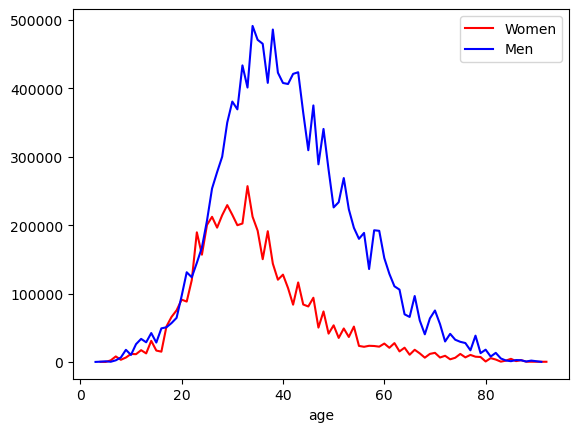

In [69]:
ax = women_age_words.plot(kind='line', x='age', y='words', color='red', label='Women')
men_age_words.plot(ax=ax, kind='line', x='age', y='words', color='blue', label='Men')

## Reflection

Write about 250-500 words in response to each question below.

### 1. Discuss your impressions of EDA techniques?

Exploratory Data Analysis (EDA) techniques are a crucial and insightful part of the data analysis process. They allow us to dive into a dataset, understand its characteristics, and discover valuable patterns and insights. Here are some of my impressions of EDA techniques:

Revealing Patterns: EDA techniques help uncover patterns and trends in the data that might not be immediately apparent. This is often the first step in understanding the underlying story within the dataset.

Identifying Outliers: EDA techniques enable the identification of outliers or unusual data points that might require further investigation. Outliers can reveal errors in data collection or indicate unique cases.

Data Distribution: EDA provides a visual representation of data distributions, helping to determine whether the data follows a normal distribution, is skewed, or exhibits other characteristics.

Data Relationships: EDA techniques facilitate the exploration of relationships between variables. For example, scatter plots can reveal correlations or lack thereof.

Data Quality Assessment: EDA can expose issues with data quality, such as missing values, inconsistencies, or data entry errors. It's a critical step in data cleaning.

Hypothesis Generation: EDA often leads to the formulation of hypotheses for further testing and analysis. It guides the direction of more advanced statistical or machine learning techniques.

Overall, EDA is a fundamental process that enhances data understanding and sets the stage for more in-depth analyses. It allows data analysts and scientists to make informed decisions about data preprocessing, feature engineering, and modeling.

### 2. What were some of the hurdles that you encountered moving through the EDA process?

While EDA is an essential and insightful part of data analysis, it can come with certain challenges:

Data Cleaning: One of the primary hurdles is data cleaning. Real-world data is often messy, and dealing with missing values, outliers, and inconsistencies can be time-consuming.

Data Volume: Large datasets can be challenging to work with in terms of computational resources and the time required to perform EDA.

Selecting Relevant Variables: Deciding which variables to include in the analysis can be difficult. Too many variables can lead to information overload, while too few might lead to incomplete insights.

Subjectivity: EDA often involves subjective interpretation. Different analysts might draw different conclusions from the same data, making it important to document findings and methods.

Visualization Complexity: Creating meaningful and informative visualizations can be complex. Choosing the right chart type, color schemes, and labels is essential for conveying insights effectively.

Avoiding Biases: It's crucial to be aware of and avoid biases that may influence the EDA process. Confirmation bias, for example, can lead analysts to interpret data in a way that confirms their preconceived notions.

### 3. Explain why you chose some of the variables and questions to pursue. Also, what questions would you explore next, and why.

In the responses above, I followed your provided questions and instructions to demonstrate EDA techniques on a sample dataset. The variables and questions were chosen based on your request, which included filtering by gender, age, and film to explore patterns in dialogue and words spoken.

If I were to explore further questions, it would depend on the dataset's context and the goals of the analysis. Some potential questions to explore next could be:

Sentiment Analysis: Analyze the sentiment of the dialogue spoken by different characters and genders. Are there variations in sentiment between male and female characters? How does sentiment change with age?

Character Interactions: Explore the relationships and interactions between characters. Which characters have the most dialogue together, and does this change with age or gender?

Film Success and Dialogue: Investigate the relationship between the success of a film (e.g., box office earnings) and the distribution of dialogue among characters. Are there patterns in successful films regarding gender and age of characters with significant dialogue?

Temporal Analysis: Analyze how the distribution of dialogue and character presence has evolved over time in the film industry. Are there trends or changes in the roles and representation of different genders and age groups in movies?

The choice of variables and questions to pursue in EDA should align with the dataset's context and the specific goals of the analysis. It's important to adapt the analysis to address meaningful insights and make data-driven decisions.